In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Tidying and Cleaning

### Pew Dataset

In [3]:
pew = pd.read_csv("pew.csv")
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [4]:
pew.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

In [5]:
pew.dtypes

religion              object
<$10k                  int64
$10-20k                int64
$20-30k                int64
$30-40k                int64
$40-50k                int64
$50-75k                int64
$75-100k               int64
$100-150k              int64
>150k                  int64
Don't know/refused     int64
dtype: object

In [6]:
pew_tidy = pew.melt(id_vars="religion", var_name = "income", value_name = "frequency")
pew_tidy

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [7]:
pew.columns, pew_tidy.columns

(Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
        '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
       dtype='object'),
 Index(['religion', 'income', 'frequency'], dtype='object'))

In [8]:
pew_tidy.dtypes

religion     object
income       object
frequency     int64
dtype: object

In [9]:
pew_tidy.memory_usage()

Index         132
religion     1440
income       1440
frequency    1440
dtype: int64

In [10]:
pew_tidy.religion = pew_tidy.religion.astype("category")
pew_tidy.income = pew_tidy.income.astype("category")

In [11]:
pew_tidy.dtypes

religion     category
income       category
frequency       int64
dtype: object

In [12]:
pew_tidy.religion.unique(), pew_tidy.income.unique()

(['Agnostic', 'Atheist', 'Buddhist', 'Catholic', 'Don’t know/refused', ..., 'Orthodox', 'Other Christian', 'Other Faiths', 'Other World Religions', 'Unaffiliated']
 Length: 18
 Categories (18, object): ['Agnostic', 'Atheist', 'Buddhist', 'Catholic', ..., 'Other Christian', 'Other Faiths', 'Other World Religions', 'Unaffiliated'],
 ['<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k', '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused']
 Categories (10, object): ['$10-20k', '$100-150k', '$20-30k', '$30-40k', ..., '$75-100k', '<$10k', '>150k', 'Don't know/refused'])

In [13]:
pew_tidy.religion.value_counts()

religion
Agnostic                   10
Atheist                    10
Other World Religions      10
Other Faiths               10
Other Christian            10
Orthodox                   10
Muslim                     10
Mormon                     10
Mainline Prot              10
Jewish                     10
Jehovah's Witness          10
Historically Black Prot    10
Hindu                      10
Evangelical Prot           10
Don’t know/refused         10
Catholic                   10
Buddhist                   10
Unaffiliated               10
Name: count, dtype: int64

In [14]:
pew_tidy.memory_usage()

Index         132
religion      880
income        560
frequency    1440
dtype: int64

### Tuberculosis Dataset

In [15]:
tb = pd.read_csv("tb.csv")
tb

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [16]:
tb.dtypes

iso2      object
year       int64
m04      float64
m514     float64
m014     float64
m1524    float64
m2534    float64
m3544    float64
m4554    float64
m5564    float64
m65      float64
mu       float64
f04      float64
f514     float64
f014     float64
f1524    float64
f2534    float64
f3544    float64
f4554    float64
f5564    float64
f65      float64
fu       float64
dtype: object

In [17]:
tb[(tb.year == 1989) & (tb.iso2 == "AD")].values

array([['AD', 1989, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=object)

In [19]:
tb.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5769.0,1994.229329,8.423265,1980.0,1987.0,1994.0,2002.00,2008.0
m04,392.0,8.806122,46.094789,0.0,0.0,0.0,2.00,655.0
m514,401.0,28.975062,127.881505,0.0,0.0,1.0,8.00,1519.0
m014,2381.0,79.438051,280.489536,0.0,0.0,6.0,36.00,4648.0
m1524,2407.0,922.364769,4278.638975,0.0,10.0,92.0,511.50,77121.0
m2534,2408.0,1301.894518,5253.398971,0.0,15.0,151.5,728.00,83850.0
m3544,2415.0,1205.566046,5409.064589,0.0,16.0,134.0,591.50,90498.0
m4554,2421.0,983.515489,4780.782748,0.0,13.0,98.0,434.00,78815.0
m5564,2414.0,696.171914,3771.934518,0.0,9.0,62.0,273.75,57492.0
m65,2408.0,609.440615,3660.224592,0.0,8.0,53.0,227.25,70376.0


In [31]:
tb_tidy = tb.melt(id_vars = ["iso2", "year"], var_name = "sex_and_age", value_name = "cases")
tb_tidy

,iso2,year,sex_and_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN
...,...,...,...,...
115375,ZW,2004,fu,NaN
115376,ZW,2005,fu,NaN
115377,ZW,2006,fu,NaN
115378,ZW,2007,fu,NaN


In [32]:
tb_tidy.head()

,iso2,year,sex_and_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN


In [38]:
tb_tidy["sex"] = tb_tidy.sex_and_age.str.slice(0, 1)
tb_tidy.sex

0         m
1         m
2         m
3         m
4         m
         ..
115375    f
115376    f
115377    f
115378    f
115379    f
Name: sex, Length: 115380, dtype: object

In [39]:
tb_tidy.sex_and_age.str.slice(0, 1).unique()

array(['m', 'f'], dtype=object)

In [37]:
tb_tidy.sex_and_age.str.slice(1).unique()

array(['04', '514', '014', '1524', '2534', '3544', '4554', '5564', '65',
       'u'], dtype=object)

In [40]:
tb_tidy["age_group"] = tb_tidy.sex_and_age.str.slice(1)
tb_tidy["age_group"]

0         04
1         04
2         04
3         04
4         04
          ..
115375     u
115376     u
115377     u
115378     u
115379     u
Name: age_group, Length: 115380, dtype: object

In [41]:
tb_tidy = tb_tidy.drop(columns = "sex_and_age")
tb_tidy

,iso2,year,cases,sex,age_group
0,AD,1989,NaN,m,04
1,AD,1990,NaN,m,04
2,AD,1991,NaN,m,04
3,AD,1992,NaN,m,04
4,AD,1993,NaN,m,04
...,...,...,...,...,...
115375,ZW,2004,NaN,f,u
115376,ZW,2005,NaN,f,u
115377,ZW,2006,NaN,f,u
115378,ZW,2007,NaN,f,u


In [42]:
tb_tidy.describe().T

,count,mean,std,min,25%,50%,75%,max
year,115380.0,1994.229329,8.422571,1980.0,1987.0,1994.0,2002.0,2008.0
cases,35750.0,609.378881,3278.187960,0.0,4.0,36.0,245.0,90498.0


In [47]:
tb_tidy_without_missing = tb_tidy.dropna()

In [48]:
tb_tidy_without_missing[tb_tidy_without_missing.iso2 == "BG"]

,iso2,year,cases,sex,age_group
528,BG,2005,0.0,m,04
530,BG,2007,2.0,m,04
531,BG,2008,1.0,m,04
6297,BG,2005,9.0,m,514
6299,BG,2007,5.0,m,514
...,...,...,...,...,...
104371,BG,2006,59.0,f,65
104372,BG,2007,46.0,f,65
104373,BG,2008,44.0,f,65
110139,BG,2005,0.0,f,u


In [49]:
tb_tidy_without_missing[tb_tidy_without_missing.iso2 == "BG"].cases.mean()

58.46478873239437

In [51]:
tb_tidy_without_missing.age_group.str.len().value_counts()

age_group
4    23912
2     5561
3     5536
1      543
Name: count, dtype: int64

In [54]:
def process_age_group(age_group):
    ages = {"04": "0-4", "65": "65+", "u": "unknown"}
    if age_group in ages:
        return ages[age_group]
    else:
        return f"{age_group[:-2]}-{age_group[-2:]}"
    

In [56]:
tb_tidy_without_missing.age_group = tb_tidy_without_missing.age_group.apply(process_age_group)
tb_tidy_without_missing.age_group

C:\Users\diton\AppData\Local\Temp\ipykernel_29532\1675410348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_tidy_without_missing.age_group = tb_tidy_without_missing.age_group.apply(process_age_group)


15            0-4
16            0-4
18            0-4
42            0-4
43            0-4
           ...   
115195    unknown
115269    unknown
115323    unknown
115350    unknown
115379    unknown
Name: age_group, Length: 35552, dtype: object

In [57]:
tb_tidy_without_missing.age_group.unique()

array(['0-4', '5-14', '0-14', '15-24', '25-34', '35-44', '45-54', '55-64',
       '65+', 'unknown'], dtype=object)

In [58]:
tb_tidy_without_missing.age_group.str.split("-", expand=True)

,0,1
15,0,4
16,0,4
18,0,4
42,0,4
43,0,4
...,...,...
115195,unknown,None
115269,unknown,None
115323,unknown,None
115350,unknown,None


In [59]:
tb_tidy_without_missing.age_group.str.split("-", expand=True).dtypes

0    object
1    object
dtype: object

In [76]:
tb_tidy_without_missing.sex = tb_tidy_without_missing.sex.astype("category")
tb_tidy_without_missing.age_group = tb_tidy_without_missing.age_group.astype("category")

In [82]:
tb_tidy_without_missing = tb_tidy_without_missing[["iso2", "year", "sex", "age_group", "cases"]]
tb_tidy_without_missing

,iso2,year,sex,age_group,cases
0,AD,2005,m,0-4,0
1,AD,2006,m,0-4,0
2,AD,2008,m,0-4,0
3,AE,2006,m,0-4,0
4,AE,2007,m,0-4,0
...,...,...,...,...,...
35547,VU,2008,f,unknown,0
35548,YE,2008,f,unknown,0
35549,ZA,2008,f,unknown,0
35550,ZM,2008,f,unknown,0


In [83]:
tb_tidy_without_missing.cases = tb_tidy_without_missing.cases.astype(int)

In [84]:
tb_tidy_without_missing.sort_values(["iso2", "year"])

,iso2,year,sex,age_group,cases
793,AD,1996,m,0-14,0
3160,AD,1996,m,15-24,0
5553,AD,1996,m,25-34,0
7947,AD,1996,m,35-44,4
10348,AD,1996,m,45-54,1
...,...,...,...,...,...
28131,ZW,2008,f,35-44,2890
30518,ZW,2008,f,45-54,467
32898,ZW,2008,f,55-64,174
35280,ZW,2008,f,65+,105


In [85]:
tb_tidy_without_missing = tb_tidy_without_missing.reset_index(drop=True)
tb_tidy_without_missing

,iso2,year,sex,age_group,cases
0,AD,2005,m,0-4,0
1,AD,2006,m,0-4,0
2,AD,2008,m,0-4,0
3,AE,2006,m,0-4,0
4,AE,2007,m,0-4,0
...,...,...,...,...,...
35547,VU,2008,f,unknown,0
35548,YE,2008,f,unknown,0
35549,ZA,2008,f,unknown,0
35550,ZM,2008,f,unknown,0


In [86]:
tb_tidy_without_missing.to_csv("tb_tidy.csv", index = None)

### Weather Dataset

In [118]:
weather_data = pd.read_csv("weather.csv")
weather_data

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [119]:
weather_data = weather_data.melt(id_vars = ["id", "year", "month", "element"], var_name = "day")

In [120]:
weather_data.day.unique()

array(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11',
       'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20',
       'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29',
       'd30', 'd31'], dtype=object)

In [121]:
weather_data.day = weather_data.day.str.slice(1).astype(int)

In [122]:
weather_data_tidy = weather_data.dropna()

In [123]:
weather_data_tidy

,id,year,month,element,day,value
20,MX17004,2010,12,tmax,1,29.9
21,MX17004,2010,12,tmin,1,13.8
24,MX17004,2010,2,tmax,2,27.3
25,MX17004,2010,2,tmin,2,14.4
40,MX17004,2010,11,tmax,2,31.3
...,...,...,...,...,...,...
631,MX17004,2010,8,tmin,29,15.3
638,MX17004,2010,1,tmax,30,27.8
639,MX17004,2010,1,tmin,30,14.5
674,MX17004,2010,8,tmax,31,25.4


In [124]:
weather_data_tidy.pivot_table(index = ["id", "year", "month", "day"], columns = "element", values = "value")

element                 tmax  tmin
id      year month day            
MX17004 2010 1     30   27.8  14.5
             2     2    27.3  14.4
                   3    24.1  14.4
                   11   29.7  13.4
                   23   29.9  10.7
             3     5    32.1  14.2
                   10   34.5  16.8
                   16   31.1  17.6
             4     27   36.3  16.7
             5     27   33.2  18.2
             6     17   28.0  17.5
                   29   30.1  18.0
             7     3    28.6  17.5
                   14   29.9  16.5
             8     5    29.6  15.8
                   8    29.0  17.3
                   13   29.8  16.5
                   23   26.4  15.0
                   25   29.7  15.6
                   29   28.0  15.3
                   31   25.4  15.4
             10    5    27.0  14.0
                   7    28.1  12.9
                   14   29.5  13.0
                   15   28.7  10.5
                   28   31.2  15.0
             11    2    31.3  16.3
                   4    27.2  12.0
                   5    26.3   7.9
                   26   28.1  12.1
                   27   27.7  14.2
             12    1    29.9  13.8
                   6    27.8  10.5

In [126]:
weather_data_tidy = weather_data_tidy.reset_index()

In [127]:
weather_data_tidy.year, weather_data_tidy.month, weather_data_tidy.day

(0     2010
 1     2010
 2     2010
 3     2010
 4     2010
       ... 
 61    2010
 62    2010
 63    2010
 64    2010
 65    2010
 Name: year, Length: 66, dtype: int64,
 0     12
 1     12
 2      2
 3      2
 4     11
       ..
 61     8
 62     1
 63     1
 64     8
 65     8
 Name: month, Length: 66, dtype: int64,
 0      1
 1      1
 2      2
 3      2
 4      2
       ..
 61    29
 62    30
 63    30
 64    31
 65    31
 Name: day, Length: 66, dtype: int32)

In [129]:
weather_data_tidy["daytime"] = pd.to_datetime(weather_data_tidy[["year", "month", "day"]])

In [130]:
weather_data_tidy

,index,id,year,month,element,day,value,daytime
0,20,MX17004,2010,12,tmax,1,29.9,2010-12-01
1,21,MX17004,2010,12,tmin,1,13.8,2010-12-01
2,24,MX17004,2010,2,tmax,2,27.3,2010-02-02
3,25,MX17004,2010,2,tmin,2,14.4,2010-02-02
4,40,MX17004,2010,11,tmax,2,31.3,2010-11-02
...,...,...,...,...,...,...,...,...
61,631,MX17004,2010,8,tmin,29,15.3,2010-08-29
62,638,MX17004,2010,1,tmax,30,27.8,2010-01-30
63,639,MX17004,2010,1,tmin,30,14.5,2010-01-30
64,674,MX17004,2010,8,tmax,31,25.4,2010-08-31


In [131]:
weather_data_tidy[["id", "year", "month", "day", "daytime", "element", "value"]]

,id,year,month,day,daytime,element,value
0,MX17004,2010,12,1,2010-12-01,tmax,29.9
1,MX17004,2010,12,1,2010-12-01,tmin,13.8
2,MX17004,2010,2,2,2010-02-02,tmax,27.3
3,MX17004,2010,2,2,2010-02-02,tmin,14.4
4,MX17004,2010,11,2,2010-11-02,tmax,31.3
...,...,...,...,...,...,...,...
61,MX17004,2010,8,29,2010-08-29,tmin,15.3
62,MX17004,2010,1,30,2010-01-30,tmax,27.8
63,MX17004,2010,1,30,2010-01-30,tmin,14.5
64,MX17004,2010,8,31,2010-08-31,tmax,25.4


### Billboard Dataset

In [211]:
billboard_data = pd.read_csv("billboard.csv")
billboard_data

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
billboard_data[billboard_data.wk65.notna()]

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
62,2000,Creed,Higher,5:16,1999-09-11,81,77.0,73.0,63.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
billboard_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,317.0,2000.000000,0.000000,2000.0,2000.00,2000.0,2000.0,2000.0
wk1,317.0,79.958991,14.686865,15.0,74.00,81.0,91.0,100.0
wk2,312.0,71.173077,18.200443,8.0,63.00,73.0,84.0,100.0
wk3,307.0,65.045603,20.752302,6.0,53.00,66.0,79.0,100.0
wk4,300.0,59.763333,22.324619,5.0,44.75,61.0,76.0,100.0
...,...,...,...,...,...,...,...,...
wk72,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk73,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk74,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk75,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
billboard_data[billboard_data.columns[-15:]].describe().T

,count,mean,std,min,25%,50%,75%,max
wk62,2.0,44.5,3.535534,42.0,43.25,44.5,45.75,47.0
wk63,2.0,47.5,3.535534,45.0,46.25,47.5,48.75,50.0
wk64,2.0,50.0,0.000000,50.0,50.00,50.0,50.00,50.0
wk65,1.0,49.0,NaN,49.0,49.00,49.0,49.00,49.0
wk66,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk67,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk68,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk70,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk71,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
billboard_data = billboard_data.melt(id_vars = ["year", "artist", "track", "time", "date.entered"], var_name="week", value_name="position")

In [216]:
billboard_data = billboard_data.dropna()
billboard_data

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,wk63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,wk63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,wk64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,wk64,50.0


In [217]:
billboard_data.week = billboard_data.week.str.slice(2).astype(int)

In [218]:
billboard_data

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50.0


In [219]:
billboard_data.dtypes

year              int64
artist           object
track            object
time             object
date.entered     object
week              int32
position        float64
dtype: object

In [220]:
billboard_data.position = billboard_data.position.astype(int)

In [221]:
billboard_data

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45
20033,2000,Creed,Higher,5:16,1999-09-11,64,50
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50


In [222]:
billboard_data["date.entered"] = pd.to_datetime(billboard_data["date.entered"])

In [223]:
billboard_data

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45
20033,2000,Creed,Higher,5:16,1999-09-11,64,50
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50


In [226]:
pd.Timedelta(1, "w")

Timedelta('7 days 00:00:00')

In [227]:
intervals = billboard_data.week.apply(lambda x: pd.Timedelta(x - 1, "w"))

In [228]:
billboard_data["date_inclusion"] =  billboard_data["date.entered"] + intervals

In [229]:
billboard_data

,year,artist,track,time,date.entered,week,position,date_inclusion
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57,2000-04-15
...,...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50,2000-11-18
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45,2000-08-12
20033,2000,Creed,Higher,5:16,1999-09-11,64,50,2000-11-25
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50,2000-08-19


In [230]:
billboard_data[billboard_data.track == "Higher"]

,year,artist,track,time,date.entered,week,position,date_inclusion
62,2000,Creed,Higher,5:16,1999-09-11,1,81,1999-09-11
379,2000,Creed,Higher,5:16,1999-09-11,2,77,1999-09-18
696,2000,Creed,Higher,5:16,1999-09-11,3,73,1999-09-25
1013,2000,Creed,Higher,5:16,1999-09-11,4,63,1999-10-02
1330,2000,Creed,Higher,5:16,1999-09-11,5,61,1999-10-09
1647,2000,Creed,Higher,5:16,1999-09-11,6,58,1999-10-16
1964,2000,Creed,Higher,5:16,1999-09-11,7,56,1999-10-23
2281,2000,Creed,Higher,5:16,1999-09-11,8,52,1999-10-30
2598,2000,Creed,Higher,5:16,1999-09-11,9,56,1999-11-06
2915,2000,Creed,Higher,5:16,1999-09-11,10,57,1999-11-13


In [231]:
billboard_data = billboard_data.drop(columns = ["date.entered", "week"])

In [233]:
billboard_data = billboard_data[["year", "artist", "track", "time", "date_inclusion", "position"]]

In [234]:
billboard_data


,year,artist,track,time,date_inclusion,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57
...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,2000-11-18,50
19833,2000,Lonestar,Amazed,4:25,2000-08-12,45
20033,2000,Creed,Higher,5:16,2000-11-25,50
20150,2000,Lonestar,Amazed,4:25,2000-08-19,50


In [235]:
billboard_data.groupby(["artist", "track"]).value_counts()


artist           track                    year  time  date_inclusion  position
2 Pac            Baby Don't Cry (Keep...  2000  4:22  2000-02-26      87          1
                                                      2000-03-04      82          1
                                                      2000-04-08      99          1
                                                      2000-04-01      94          1
                                                      2000-03-25      87          1
                                                                                 ..
matchbox twenty  Bent                     2000  4:12  2000-10-14      12          1
                                                      2000-10-07      9           1
                                                      2000-09-30      6           1
                                                      2000-09-23      4           1
                                                      2001-01-20      48         

In [238]:
billboard_data[billboard_data.position == 1]

,year,artist,track,time,date_inclusion,position
1776,2000,Madonna,Music,3:45,2000-09-16,1
2093,2000,Madonna,Music,3:45,2000-09-23,1
2232,2000,"Aguilera, Christina",What A Girl Wants,3:18,2000-01-15,1
2410,2000,Madonna,Music,3:45,2000-09-30,1
2482,2000,Sisqo,Incomplete,3:52,2000-08-12,1
2549,2000,"Aguilera, Christina",What A Girl Wants,3:18,2000-01-22,1
2610,2000,Destiny's Child,Independent Women Pa...,3:38,2000-11-18,1
2727,2000,Madonna,Music,3:45,2000-10-07,1
2788,2000,Santana,"Maria, Maria",4:18,2000-04-08,1
2799,2000,Sisqo,Incomplete,3:52,2000-08-19,1


In [239]:
billboard_data[billboard_data.position == 1].artist

1776                 Madonna
2093                 Madonna
2232     Aguilera, Christina
2410                 Madonna
2482                   Sisqo
2549     Aguilera, Christina
2610         Destiny's Child
2727                 Madonna
2788                 Santana
2799                   Sisqo
2927         Destiny's Child
3105                 Santana
3181     Aguilera, Christina
3222           Carey, Mariah
3244         Destiny's Child
3312                   Janet
3422                 Santana
3498     Aguilera, Christina
3561         Destiny's Child
3629                   Janet
3739                 Santana
3815     Aguilera, Christina
3878         Destiny's Child
3880         Destiny's Child
3937       Iglesias, Enrique
3946                   Janet
4023                  N'Sync
4056                 Santana
4120         matchbox twenty
4129                 Aaliyah
4132     Aguilera, Christina
4195         Destiny's Child
4197         Destiny's Child
4254       Iglesias, Enrique
4340          

In [240]:
billboard_data[billboard_data.position == 1].artist.unique()

array(['Madonna', 'Aguilera, Christina', 'Sisqo', "Destiny's Child",
       'Santana', 'Carey, Mariah', 'Janet', 'Iglesias, Enrique', "N'Sync",
       'matchbox twenty', 'Aaliyah', 'Savage Garden', 'Vertical Horizon',
       'Creed', 'Lonestar'], dtype=object)

In [241]:
billboard_data[billboard_data.position == 1].artist.value_counts()

artist
Destiny's Child        14
Santana                10
Aguilera, Christina     6
Madonna                 4
Savage Garden           4
Janet                   3
Iglesias, Enrique       3
Sisqo                   2
N'Sync                  2
Lonestar                2
Carey, Mariah           1
matchbox twenty         1
Aaliyah                 1
Vertical Horizon        1
Creed                   1
Name: count, dtype: int64

### Weather Dataset II (https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv)

In [292]:
weather = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")

In [293]:
weather

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [294]:
weather.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [295]:
weather.dtypes

EDT                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles            int64
 Mean VisibilityMiles           int64
 Min VisibilityMiles            int64
 Max Wind SpeedMPH              int64
 Mean Wind SpeedMPH             int64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                     int64
 Events                        object
 WindDirDegrees                 int64
dtype: object

In [296]:
weather.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
                   "mean_dew", "min_dew", "max_humidity", "mean_humidity",
                   "min_humidity", "max_pressure", "mean_pressure",
                   "min_pressure", "max_visibility", "mean_visibility",
                   "min_visibility", "max_wind", "mean_wind", "max_gusts",
                   "precipitation", "cloud_cover", "events", "wind_dir"
                  ]

In [297]:
weather

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [298]:
weather["date"] = pd.to_datetime(weather["date"])

In [299]:
weather.precipitation.unique()

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [300]:
weather.loc[weather.precipitation == "T", "precipitation"] = 1e-5

In [301]:
weather.precipitation.unique()

array(['0.00', 1e-05, '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [302]:
weather.precipitation = weather.precipitation.astype(float)

In [303]:
weather.events.unique()

array([nan, 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

In [304]:
weather.events.value_counts(dropna = False)

events
NaN                           204
Rain                           69
Rain-Thunderstorm              26
Fog                            13
Snow                           13
Fog-Rain                       11
Thunderstorm                    9
Fog-Rain-Thunderstorm           8
Fog-Snow                        5
Fog-Rain-Snow                   3
Rain-Snow                       3
Fog-Thunderstorm                1
Fog-Rain-Snow-Thunderstorm      1
Name: count, dtype: int64

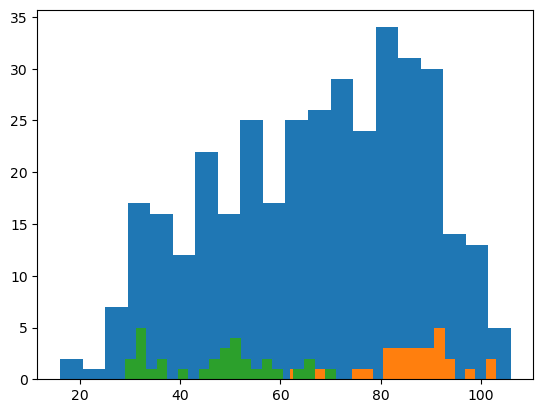

In [305]:
plt.hist(weather.max_temp, bins = 20)
plt.hist(weather[weather.date.dt.month == 6].max_temp, bins = 20)
plt.hist(weather[weather.date.dt.month == 12].max_temp, bins = 20)
plt.show()

In [306]:
weather = weather.set_index("date")

In [307]:
weather.resample("w").min_temp.mean()

date
2012-03-11    27.000000
2012-03-18    51.714286
2012-03-25    54.857143
2012-04-01    46.714286
2012-04-08    45.571429
2012-04-15    39.714286
2012-04-22    41.142857
2012-04-29    41.428571
2012-05-06    62.285714
2012-05-13    50.857143
2012-05-20    52.857143
2012-05-27    58.714286
2012-06-03    54.142857
2012-06-10    51.142857
2012-06-17    59.000000
2012-06-24    62.428571
2012-07-01    64.857143
2012-07-08    69.285714
2012-07-15    65.428571
2012-07-22    68.000000
2012-07-29    69.000000
2012-08-05    64.142857
2012-08-12    58.285714
2012-08-19    55.142857
2012-08-26    54.857143
2012-09-02    64.857143
2012-09-09    62.571429
2012-09-16    51.000000
2012-09-23    43.857143
2012-09-30    50.857143
2012-10-07    45.571429
2012-10-14    37.142857
2012-10-21    42.857143
2012-10-28    48.571429
2012-11-04    32.714286
2012-11-11    33.714286
2012-11-18    24.285714
2012-11-25    29.857143
2012-12-02    32.428571
2012-12-09    42.142857
2012-12-16    27.000000
2012-12-23 

In [309]:
weather.resample(pd.Timedelta(3, "day")).min_temp.mean()

date
2012-03-10    35.666667
2012-03-13    50.666667
2012-03-16    52.333333
2012-03-19    58.000000
2012-03-22    52.666667
                ...    
2013-02-24    26.333333
2013-02-27    31.666667
2013-03-02    21.666667
2013-03-05    28.666667
2013-03-08    35.333333
Freq: 3D, Name: min_temp, Length: 122, dtype: float64

In [310]:
weather.resample(pd.Timedelta(10, "day")).min_temp.mean()

date
2012-03-10    47.5
2012-03-20    50.4
2012-03-30    46.7
2012-04-09    40.3
2012-04-19    40.7
2012-04-29    60.1
2012-05-09    49.1
2012-05-19    59.4
2012-05-29    50.9
2012-06-08    57.4
2012-06-18    61.2
2012-06-28    69.3
2012-07-08    67.5
2012-07-18    69.3
2012-07-28    62.8
2012-08-07    57.9
2012-08-17    54.0
2012-08-27    65.6
2012-09-06    54.3
2012-09-16    44.6
2012-09-26    51.7
2012-10-06    37.1
2012-10-16    49.1
2012-10-26    33.6
2012-11-05    31.2
2012-11-15    27.7
2012-11-25    35.1
2012-12-05    31.3
2012-12-15    28.6
2012-12-25    19.3
2013-01-04    26.1
2013-01-14    19.6
2013-01-24    22.0
2013-02-03    25.0
2013-02-13    22.3
2013-02-23    26.2
2013-03-05    32.0
Freq: 10D, Name: min_temp, dtype: float64

In [312]:
weather.rolling(pd.Timedelta(3, "day")).min_temp.mean()

date
2012-03-10    24.000000
2012-03-11    27.000000
2012-03-12    35.666667
2012-03-13    44.333333
2012-03-14    49.000000
                ...    
2013-03-06    25.666667
2013-03-07    28.666667
2013-03-08    26.666667
2013-03-09    28.000000
2013-03-10    35.333333
Name: min_temp, Length: 366, dtype: float64

In [313]:
weather.rolling(pd.Timedelta(10, "day")).min_temp.mean()

date
2012-03-10    24.000000
2012-03-11    27.000000
2012-03-12    35.666667
2012-03-13    39.250000
2012-03-14    40.200000
                ...    
2013-03-06    27.700000
2013-03-07    28.100000
2013-03-08    26.900000
2013-03-09    27.000000
2013-03-10    28.800000
Name: min_temp, Length: 366, dtype: float64

In [314]:
weather.min_temp

date
2012-03-10    24
2012-03-11    30
2012-03-12    53
2012-03-13    50
2012-03-14    44
              ..
2013-03-06    29
2013-03-07    28
2013-03-08    23
2013-03-09    33
2013-03-10    50
Name: min_temp, Length: 366, dtype: int64

(array([ 5., 13., 34., 53., 39., 36., 66., 54., 44., 22.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <BarContainer object of 10 artists>)

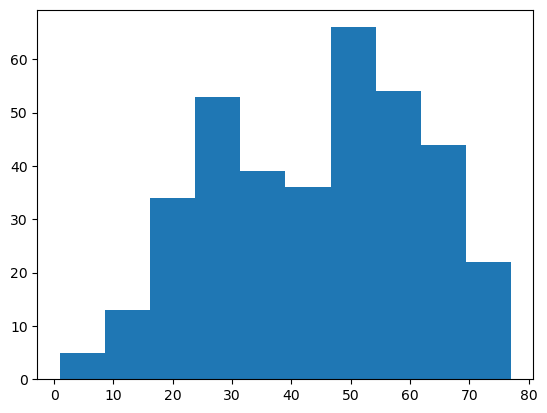

In [320]:
plt.hist(weather.min_temp)

In [318]:
# z-score
(weather.min_temp - weather.min_temp.mean()) / weather.min_temp.std()

date
2012-03-10   -1.161836
2012-03-11   -0.815038
2012-03-12    0.514354
2012-03-13    0.340955
2012-03-14   -0.005843
                ...   
2013-03-06   -0.872838
2013-03-07   -0.930638
2013-03-08   -1.219636
2013-03-09   -0.641639
2013-03-10    0.340955
Name: min_temp, Length: 366, dtype: float64

(array([ 5., 13., 34., 53., 46., 29., 66., 54., 44., 22.]),
 array([-2.49122835, -2.05195097, -1.61267358, -1.17339619, -0.7341188 ,
        -0.29484142,  0.14443597,  0.58371336,  1.02299075,  1.46226813,
         1.90154552]),
 <BarContainer object of 10 artists>)

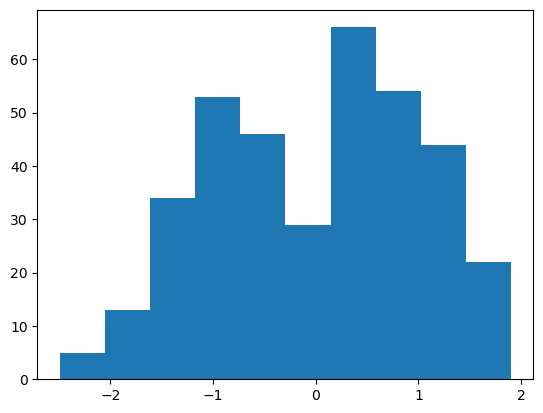

In [319]:
plt.hist((weather.min_temp - weather.min_temp.mean()) / weather.min_temp.std())

In [324]:
weather.min_temp.nsmallest(), weather.max_temp.nsmallest()

(date
 2013-01-02    1
 2013-01-03    3
 2012-12-30    4
 2013-01-22    5
 2013-02-01    5
 Name: min_temp, dtype: int64,
 date
 2013-02-01    16
 2013-01-22    18
 2013-01-21    24
 2013-01-02    25
 2013-01-14    26
 Name: max_temp, dtype: int64)

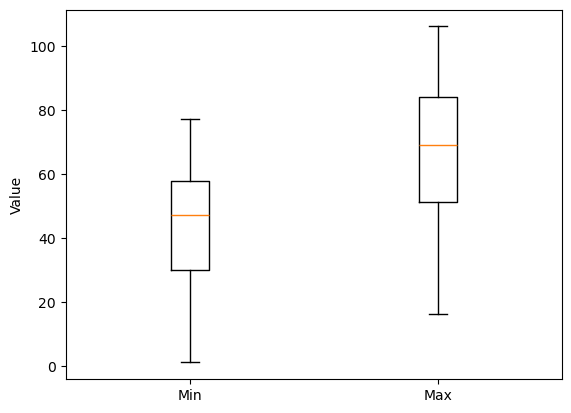

In [331]:
positions = [1, 2]  # Positions for the two boxplots (adjust as needed)
box1 = plt.boxplot(weather.min_temp, positions=[positions[0]])
box2 = plt.boxplot(weather.max_temp, positions=[positions[1]])

plt.ylabel("Value")  # Label for the y-axis
plt.xticks(positions, ["Min", "Max"])  # Set x-axis tick labels

plt.show()